In [57]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [59]:
data = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
data.shape

(4340, 8)

In [7]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [9]:
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

(array([3.908e+03, 3.110e+02, 5.700e+01, 2.500e+01, 1.900e+01, 1.700e+01,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([  20000.,  908000., 1796000., 2684000., 3572000., 4460000.,
        5348000., 6236000., 7124000., 8012000., 8900000.]),
 <BarContainer object of 10 artists>)

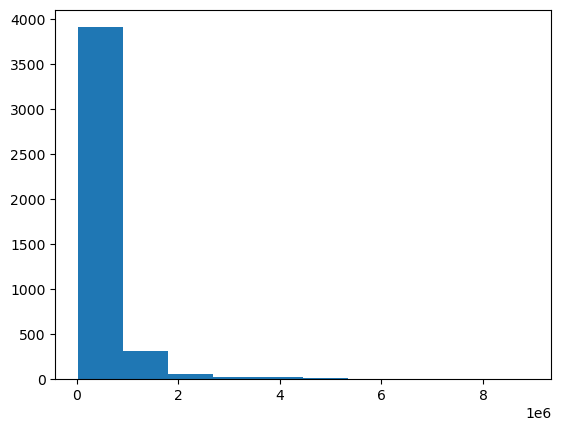

In [11]:
plt.hist(data.selling_price)

<Axes: xlabel='fuel', ylabel='year'>

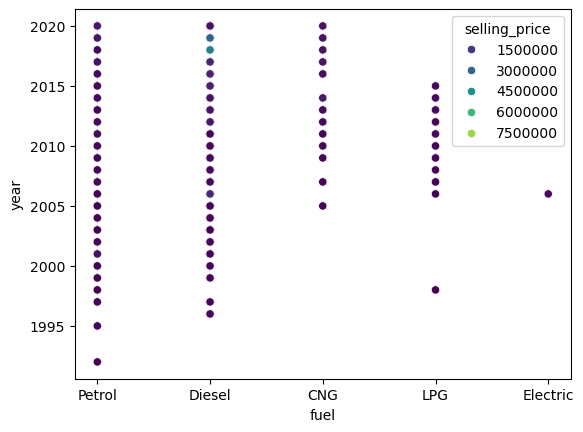

In [13]:
sns.scatterplot(x="fuel", y="year", hue="selling_price", data=data, palette="viridis")

<Axes: xlabel='km_driven', ylabel='year'>

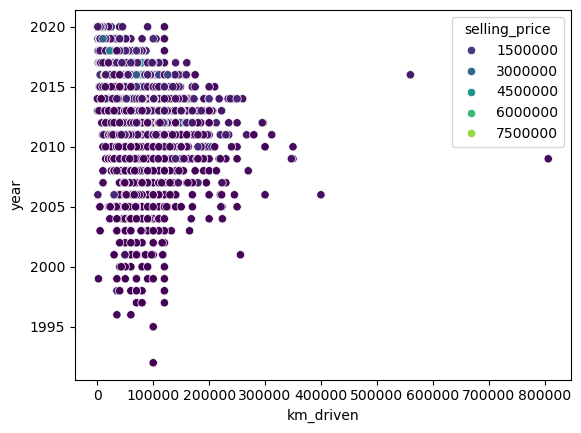

In [15]:
sns.scatterplot(x="km_driven", y="year", hue="selling_price", data=data, palette="viridis")

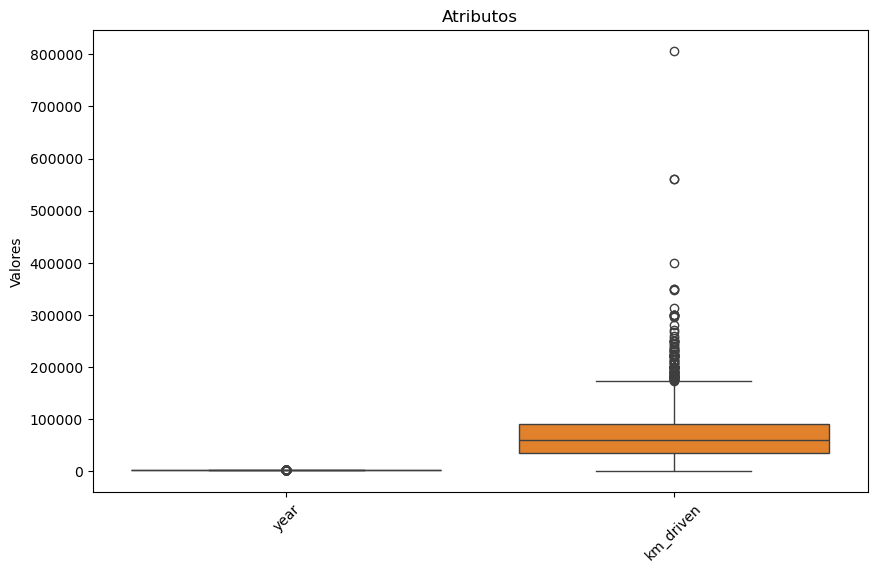

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['year','km_driven']])
plt.xticks(rotation=45), 
plt.title('Atributos')
plt.ylabel('Valores')
plt.show()

In [61]:
predictors_atr = [ "year", "km_driven"]
target_atr = ['selling_price']

In [63]:
predictors = data[predictors_atr]
target = data[target_atr]

In [65]:
predictors

,year,km_driven
0,2007,70000
1,2007,50000
2,2012,100000
3,2017,46000
4,2014,141000
...,...,...
4335,2014,80000
4336,2014,80000
4337,2009,83000
4338,2016,90000


In [67]:
target

,selling_price
0,60000
1,135000
2,600000
3,250000
4,450000
...,...
4335,409999
4336,409999
4337,110000
4338,865000


In [69]:
corr = predictors.corr()
corr

,year,km_driven
year,1.000000,-0.419688
km_driven,-0.419688,1.000000


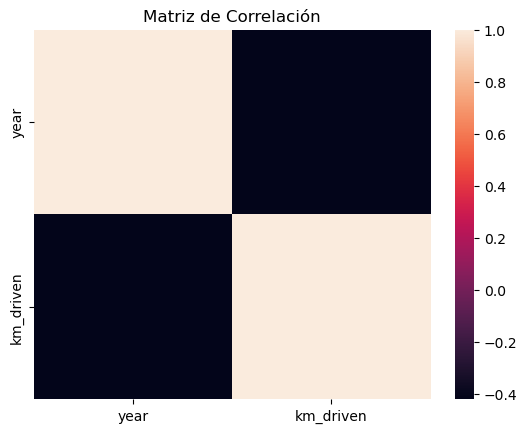

In [71]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [95]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=1)
y_train = y_train.values.ravel() 

In [97]:
bins = [0, 20000, 50000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, float('inf')]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

In [99]:
y_train_categ = pd.cut(y_train, bins=bins, labels=labels, right=False)
tree = DecisionTreeClassifier()
arbol = tree.fit(X_train, y_train_categ)

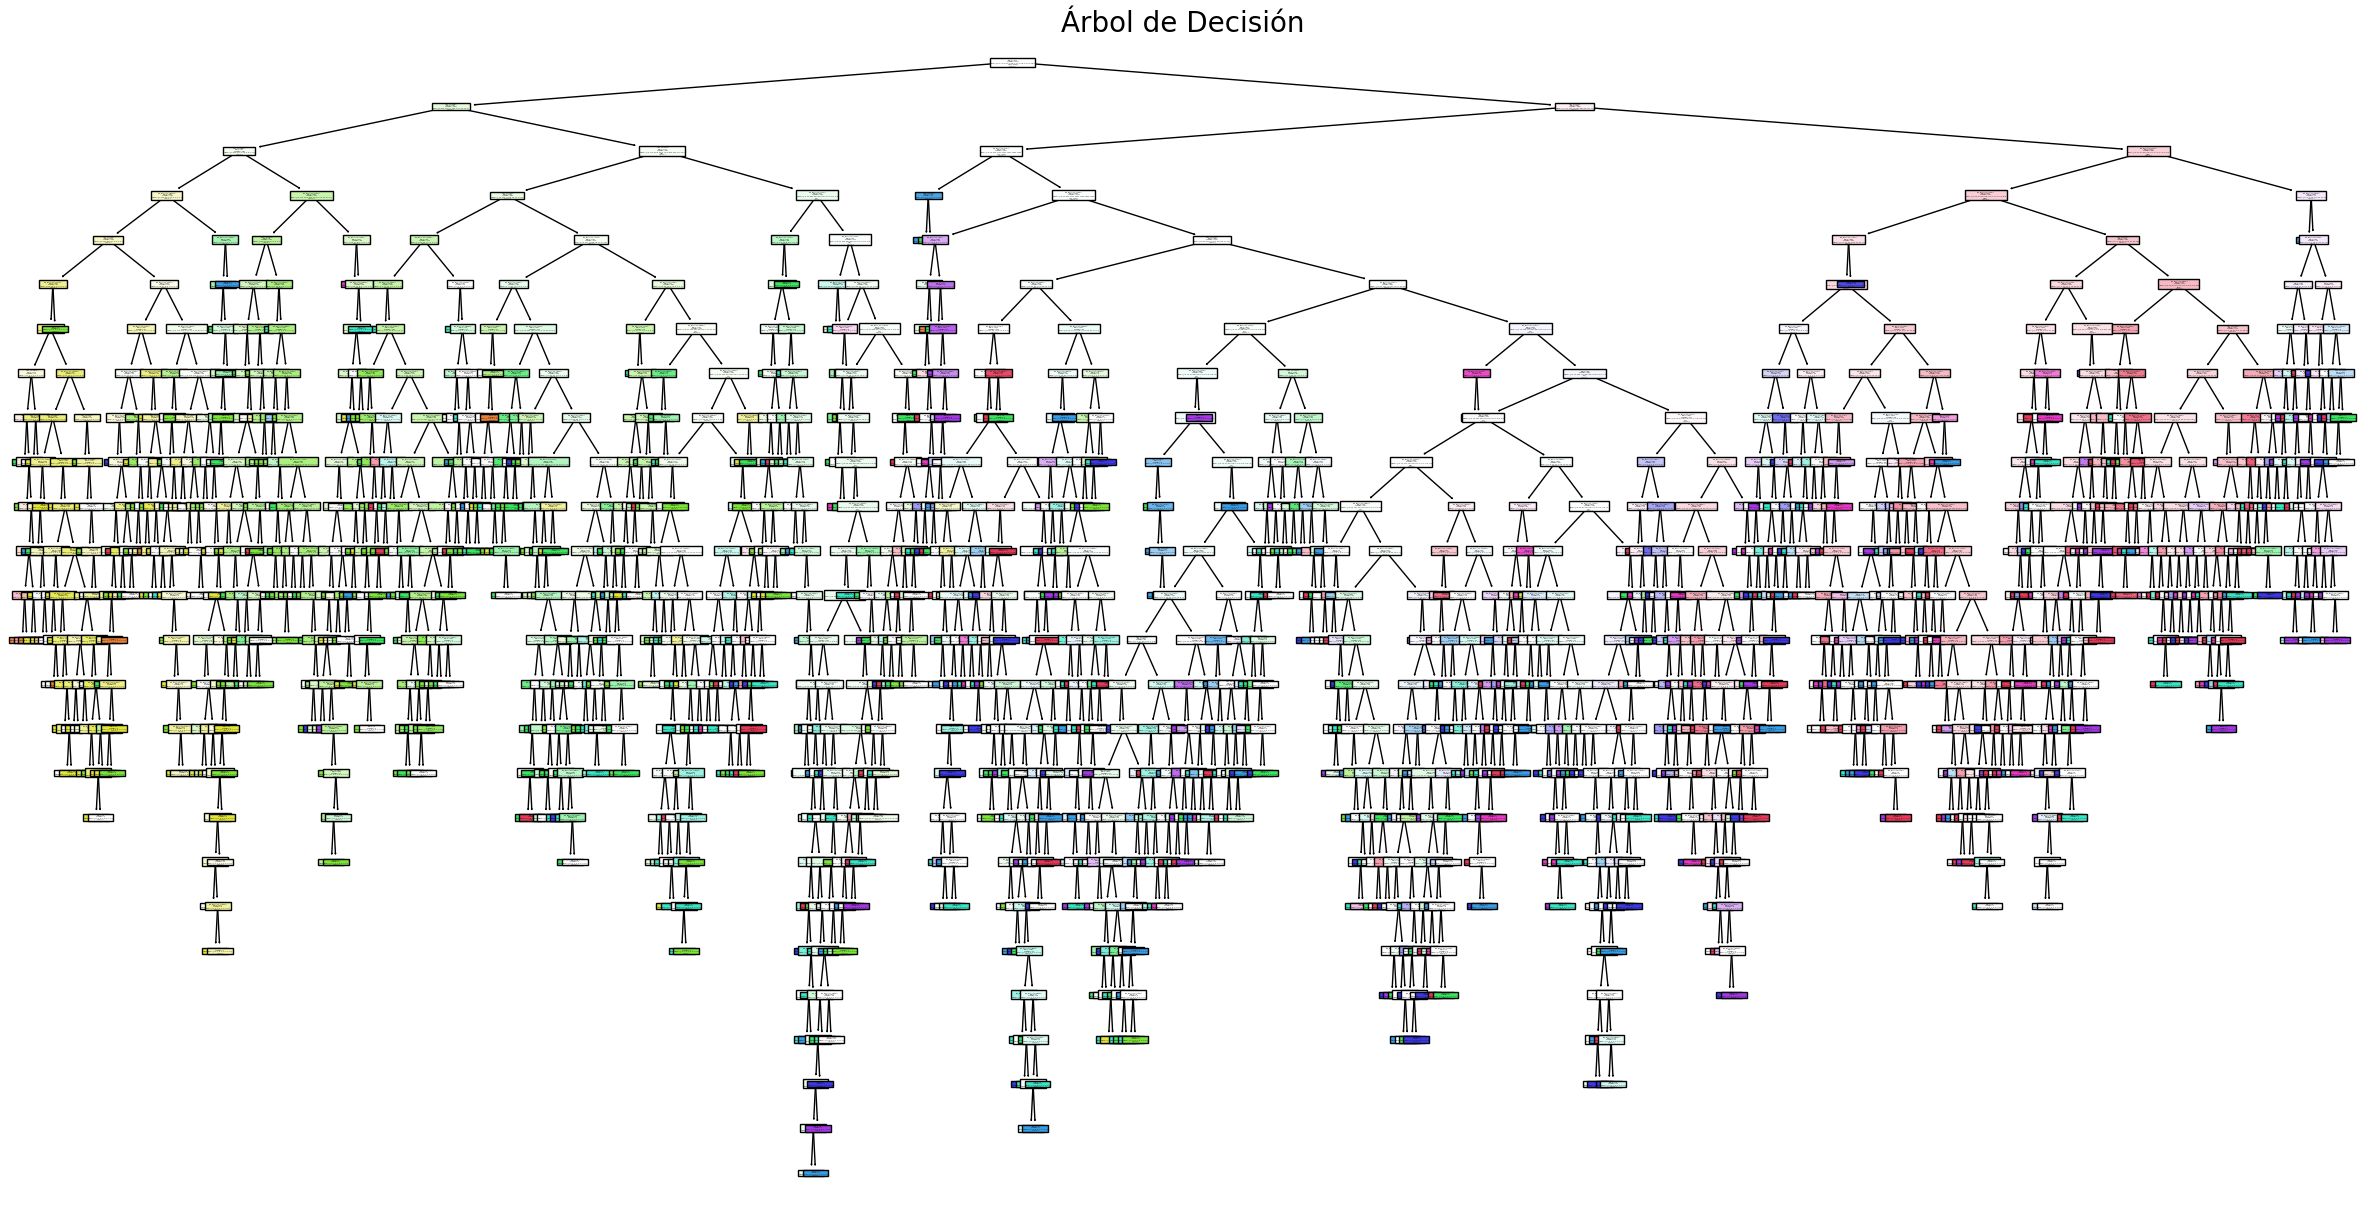

In [101]:
class_names = [str(i) for i in labels]
plt.figure(figsize=(30, 15))  # Aumentar el tamaño de la figura
plot_tree(arbol, filled=True, feature_names=predictors.columns, class_names=class_names)
plt.title("Árbol de Decisión", fontsize=20
plt.show()

In [85]:
print(y_train.shape)

(3472, 1)


In [37]:
predicciones = arbol.predict(X_test)

In [39]:
predicciones

array([ 500000,  210000,  200000,  239000,  325000,  130000,  350000,
        450000,  509999,  310000, 1000000,  500000,  400000,  100000,
         70000,  300000,  550000,  500000,  400000,  350000,  210000,
        275000,  130000,  325000,  650000,  114999,  450000,  300000,
        400000,  220000,  760000,   70000,  265000,  300000,  500000,
        385000,  350000,  123000,  229999,  315000,   65000,  150000,
        140000,  225000,  950000,  750000,  600000,  320000,  125000,
        115999,  300000,  350000,   55000,  100000,  170000,  500000,
         70000,  450000,  450000,  500000, 1470000,  200000,  600000,
         65000,  480000,  130000,   70000,  400000,  320000,  235000,
        650000,  320000,  725000,  240000,  550000,   80000,  193000,
        450000,  330000,  465000,  900000,  300000,   55000,  330000,
        125000, 1580000, 1900000,  150000,  150000, 4950000,  400000,
        300000,  650000,  300000,  420000,  750000,  210000,  459999,
        450000,  280

In [41]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,35000,50000,52000,55000,60000,61000,62000,65000,69000,70000,...,1580000,1750000,1900000,2100000,2750000,3100000,3800000,4000000,4500000,4950000
Actual,,,,,,,,,,,,,,,,,,,,,
22000,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45000,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
3899000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.18548387096774194

In [49]:
precision = precision_score(y_test, predicciones, average='weighted', zero_division=1) 
print(f"Precisión: {precision:.2f}")

Precisión: 0.39


In [53]:
recall = recall_score(y_test, predicciones, average='weighted', zero_division=1)  # o 0
print(f"Recall: {recall:.2f}")

Recall: 0.19


In [55]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.19093460733353304